In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel('updated_dataset.xlsx')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training Set Size:", X_train.shape[0])
print("Validation Set Size:", X_val.shape[0])
print("Testing Set Size:", X_test.shape[0])

# Combine Diagnosis columns into a single Diagnosis column
diagnosis_columns = ['Diagnosis_normal', 'Diagnosis_osteopenia', 'Diagnosis_osteoporosis']
df['Diagnosis'] = df[diagnosis_columns].idxmax(axis=1).str.replace('Diagnosis_', '')

# Drop original Diagnosis columns
df.drop(columns=diagnosis_columns, inplace=True)

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=np.number).columns] = imputer.fit_transform(df.select_dtypes(include=np.number))
label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

Saving updated_dataset.xlsx to updated_dataset (1).xlsx
Training Set Size: 168
Validation Set Size: 36
Testing Set Size: 36


In [ ]:
# 🚀 Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split Data into Training, Validation, and Testing Sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Patient Id', 'Diagnosis'])
y = df['Diagnosis']

categorical_features = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

encoded_data = encoder.fit_transform(X[categorical_features])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)



In [ ]:
#  Step 2: Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Train the model on the training data
model.fit(X_train, y_train)
print("Model Training Complete!")


✅ Model Training Complete!


In [ ]:
#step 3: Validate the Model on Validation Data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on validation set
y_val_pred = model.predict(X_val)

# Calculate validation metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Display Validation Metrics
print("Validation Results:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)

# Display Classification Report
print("\nClassification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))


✅ Validation Results:
Accuracy: 0.9166666666666666
Precision: 0.9262820512820513
Recall: 0.9166666666666666
F1 Score: 0.9113473167044597

Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.88      1.00      0.94        23
           2       1.00      0.88      0.93         8

    accuracy                           0.92        36
   macro avg       0.96      0.83      0.87        36
weighted avg       0.93      0.92      0.91        36



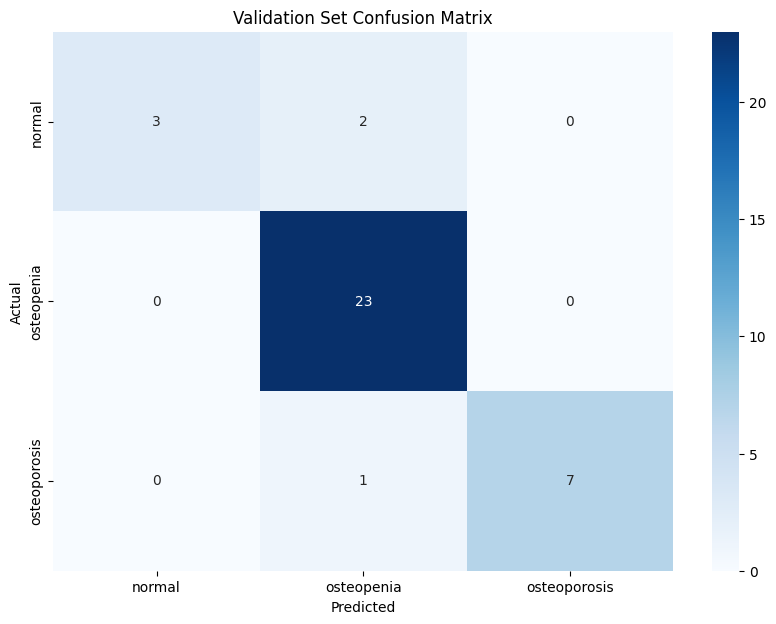

In [ ]:
#Step 3.2: Confusion Matrix for Validation Set
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Validation Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Step 4: Evaluate the Model on Testing Data
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Display Test Metrics
print(" Test Results:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

# Display Classification Report
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred))


✅ Test Results:
Accuracy: 0.9444444444444444
Precision: 0.9488888888888888
Recall: 0.9444444444444444
F1 Score: 0.9400462962962963

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.92      1.00      0.96        23
           2       1.00      1.00      1.00         7

    accuracy                           0.94        36
   macro avg       0.97      0.89      0.92        36
weighted avg       0.95      0.94      0.94        36



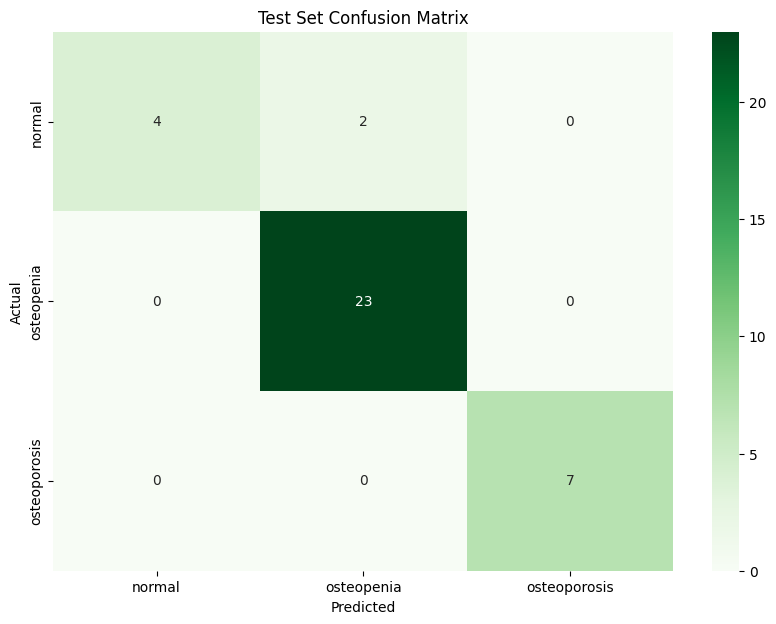

In [ ]:
#Step 4.2: Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


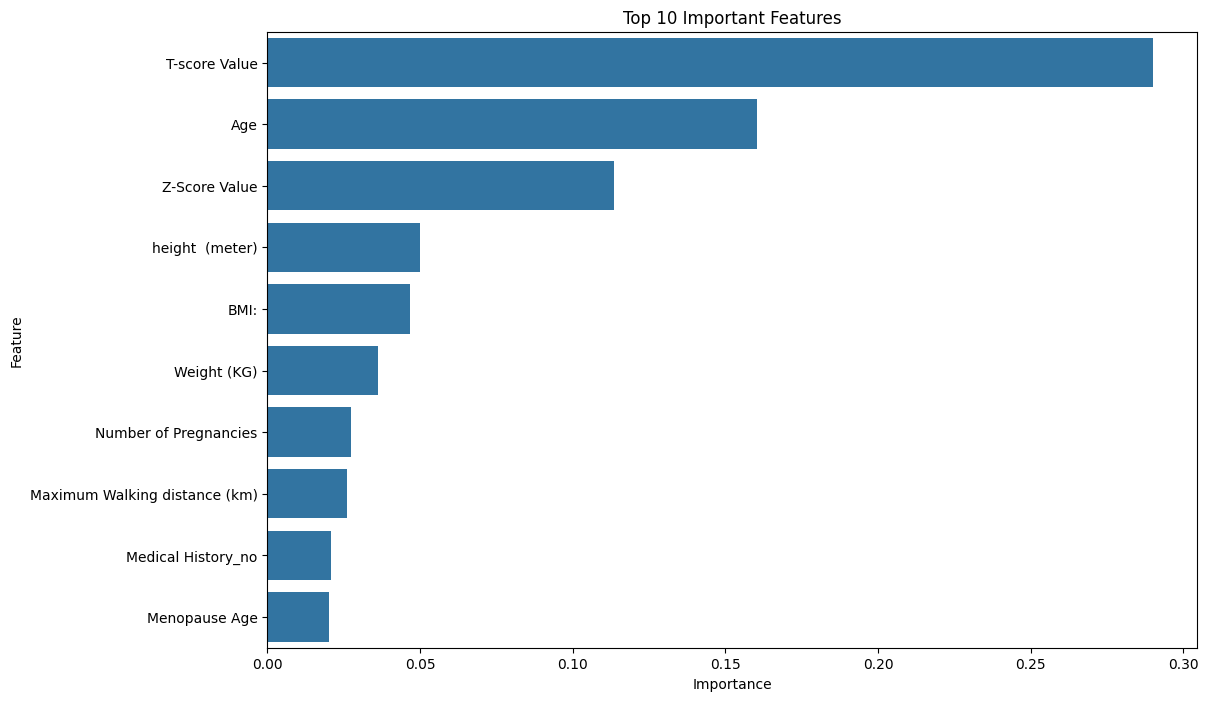

In [ ]:
# Step 5: Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Top 10 Important Features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
# Step 6: Make Predictions on New Data
new_patient = pd.DataFrame({
    'Age': [55],
    'Weight': [65],
    'Smoker': [1],
    'Gender': [1],
    'Alcoholic': [0],
    'BMI:': [25],
    'Daily Eating habits_Normal': [1],
})

training_features = X_train.columns

new_patient = new_patient.reindex(columns=training_features, fill_value=0) # Fill missing columns with 0

prediction = model.predict(new_patient)
decoded_prediction = label_encoder.inverse_transform(prediction)
print("🧠 Predicted Diagnosis:", decoded_prediction[0])

🧠 Predicted Diagnosis: osteopenia


In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display all accuracies
print(" Accuracy Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


✅ Accuracy Results:
Training Accuracy: 1.0000
Validation Accuracy: 0.9167
Testing Accuracy: 0.9444


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate Tuned Model
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Tuned Model Testing Accuracy:", test_accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
✅ Tuned Model Testing Accuracy: 0.9444444444444444


In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(" Accuracy Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


✅ Accuracy Results:
Training Accuracy: 1.0000
Validation Accuracy: 0.9167
Testing Accuracy: 0.9444
